# Title <- Insert Title Here

*Jack Yao, Jessie Lu, Kexin Feng, Vincent Luong*

# Research Question:

Is there a positive correlation between student performance and parents' educational attainment? 

Null hypothesis: There is no difference in mean of student performance between those with well-educated parents and less-educated parents. [H0: $\mu1 - \mu2 = 0$]

Alternative hypothesis: Students with well-educated parents perform better than those with less-educated parents. [H1: $\mu1 - \mu2 > 0$]

$\mu1$: student performance of well-educated parents’ group.

$\mu1$: student performance of less-educated parents’ group. 

# Introduction

Student Performance is a general term used to describe how well a student has mastered what is taught in school. In our experiment, we simply use the sum of students' grades (first exam grade plus second exam grade plus final grade) to quantify student performance in a specific subject (mathematics). Numerous factors contribute to student performance, such as family relationships, school, parents’ level of education, and class attendance. The study (Mammarella et al., 2019) explores the impact of parents' attitudes and behaviors towards math on children's math performance. It indicates that parents majoring in elementary education tend to have higher math anxiety than those attending college. Our research is inspired by these findings, aiming to investigate the relationship between parental education and children's math performance, with a focus on empowering parents to positively influence their children's academic achievements.

The dataset (2014) that will be used in this project is the Student Performance on Math dataset from the UCI machine learning repository. This project classified parents’ level of education into two groups, based on the sum of both parents’ education levels. Level0 means uneducated, level1 means finished (4th grade), level2 finished 5th to 9th grade, level3 finished secondary education, and level4 stands for higher education. If the sum of both parents’ level of education is greater than 5, we classified them as “well-educated”, or else they are “less-educated”. The measured student performance is reflected in grades on a numeric scale from 0 to 20. 

# Preliminary Results

This section will involve:
- Reading data from UCI database
- Cleaning and wrangling data
- Plotting relevant raw data
- Computing point estimates

In [1]:
# load libraries and set seed
set.seed(8888)
library(tidyverse)
library(tidymodels)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Reading and cleaning data from database

In [2]:
# Reading data from UCI Machine Learning Repository and extract CSV file from zip file
url <- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
download.file(url, "./data/studentperformance.zip")
raw_data <- unzip("./data/studentperformance.zip", "student.zip", exdir = "./data") |>
    unzip("student-mat.csv", exdir = "./data") |>
    read_delim(delim = ";")

# Refactoring column names
student_data <- raw_data |>
    select(Medu, Fedu, G1, G2, G3)
colnames(student_data) <- c("mother_education", "father_education", "term_1_grade", "term_2_grade", "final_grade")

head(student_data)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mother_education,father_education,term_1_grade,term_2_grade,final_grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4,5,6,6
1,1,5,5,6
1,1,7,8,10
4,2,15,14,15
3,3,6,10,10
4,3,15,15,15


### Plotting and analyzing relevant data

Seen from documentation of the dataset [(1)](#ref_1), the mother's and father's education levels are as follows:

|Score|Education level|
|-|-|
|$0$|None|
|$1$|up to 4th grade|
|$2$|5th to 9th grade|
|$3$|Secondary education|
|$4$|Postsecondary education|

Below are plots of the distribution of the parents' education scores:

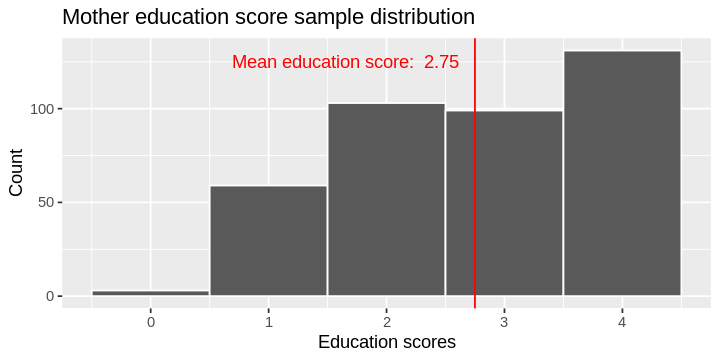

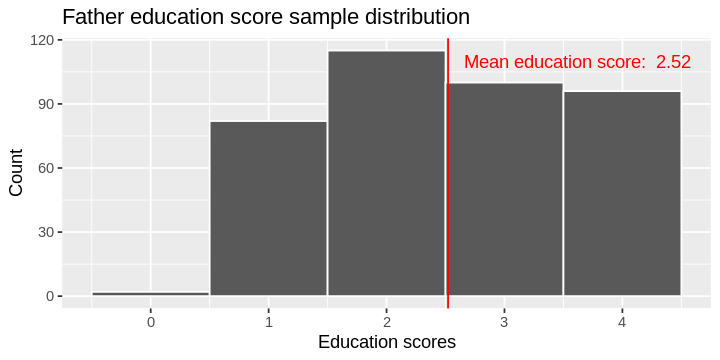

In [3]:
options(repr.plot.width = 6, repr.plot.height = 3)

mother_education_plot <- student_data |>
    ggplot(aes(x = mother_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(mother_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$mother_education), digits = 2)), x = mean(student_data$mother_education) - 1.1, y = 125, color = 'red') +
    ggtitle("Mother education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")


father_education_plot <- student_data |>
    ggplot(aes(x = father_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(father_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$father_education), digits = 2)), x = mean(student_data$father_education) + 1.1, y = 110, color = 'red') +
    ggtitle("Father education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")

mother_education_plot
father_education_plot

Observing the plots of the respective parents, it can be observed that they differ slightly in the shape, but otherwise share similar characteristics; there are very little observations of parents with "no education level" and most of the observations tend towards the upper end with both centers about the score of $2.6$. With no apparent abnormalities in the distribution, `mother_education` and `father_education` can be used as explanatory variables further in the analysis.

Referring again to the documentation [(1)](#ref_1), the all three of a student's grades are integers in the interval $[0, 20]$.
Below are plots of the distribution of students' first, second, and final grades:


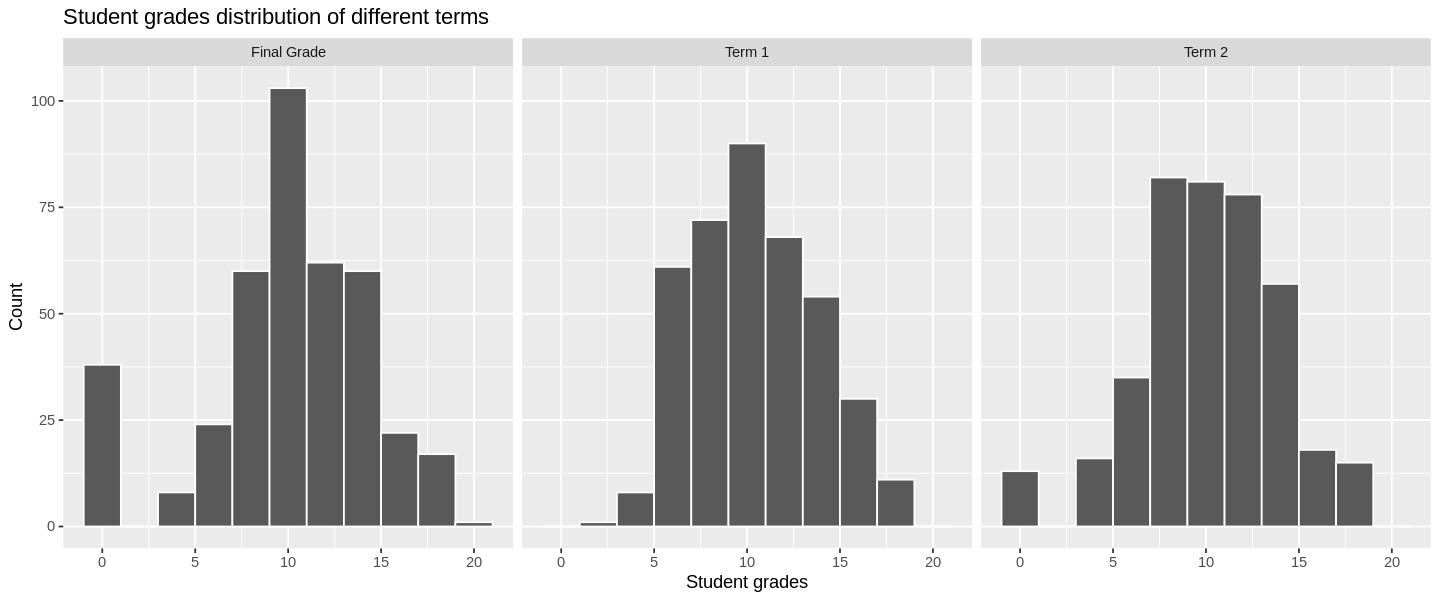

In [4]:
options(repr.plot.width = 12, repr.plot.height = 5)

labels = c(`term_1_grade` = "Term 1", `term_2_grade` = "Term 2", `final_grade` = "Final Grade")

student_grade_plot <- student_data |>
    pivot_longer(names_to = "term", values_to = "grade", cols = c(term_1_grade, term_2_grade, final_grade)) |>
    ggplot(aes(x = grade)) +
    facet_wrap(vars(term), labeller = as_labeller(labels)) +
    geom_histogram(binwidth = 2, color = 'white') +
    ggtitle("Student grades distribution of different terms") +
    xlab("Student grades") +
    ylab("Count")

student_grade_plot

Seen from the three plots above, it seems that most of the distributions seem relatively normal with center around $10$. However, looking at `Final Grade` and `Term 2`, there appears to be an increasing frequency for grades of $0$. Below is an overview of those with a final grade of $0$:

In [5]:
student_data |>
    filter(final_grade == 0) |>
    mutate(average_term_grades = (term_1_grade + term_2_grade)/2) |>
    head(10)

mother_education,father_education,term_1_grade,term_2_grade,final_grade,average_term_grades
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,7,4,0,5.5
3,4,12,0,0,6.0
1,1,8,0,0,4.0
3,4,9,0,0,4.5
4,4,11,0,0,5.5
3,4,10,0,0,5.0
3,3,4,0,0,2.0
4,3,7,9,0,8.0
2,1,5,0,0,2.5


Observing the overview, it can be seen that those with a final grade of $0$ tend to also have "relatively poorer" grades in the preceding two terms (seen by the mutated column being less than the center grade of $10$). As the significance of $0$ wasn't documented in the original data, it's difficult to determine whether it represents missing/null data or other holistic factor such as failing by not reaching a certain cutoff. Due to this uncertainty, the mean of all three grades will be used to represents the student's grade to mitigate severe skewness. Below is the distribution of mean grades of students (which appears more normally distributed with no outliers):

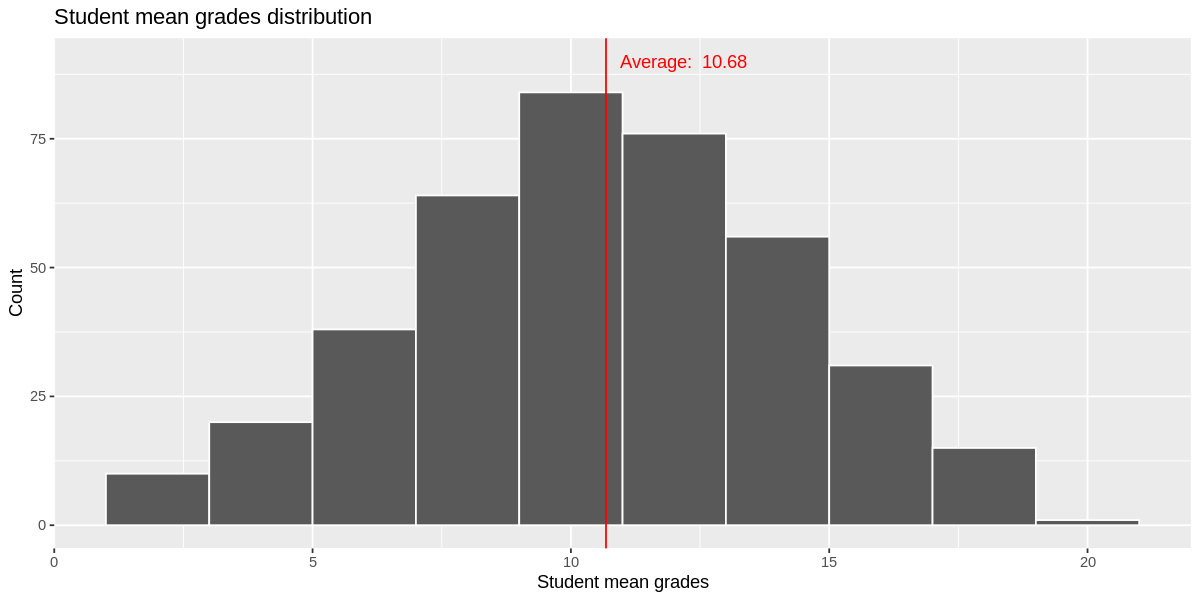

In [13]:
options(repr.plot.width = 10, repr.plot.height = 5)

student_data <- student_data |>
    mutate(average_grade = (term_1_grade + term_2_grade + final_grade) / 3)

student_grade_plot <- student_data |>
    ggplot(aes(x = average_grade)) +
    geom_histogram(binwidth = 2, color = 'white') +
    geom_vline(aes(xintercept = mean(average_grade)), color = 'red') +
    annotate("text", label = paste("Average: ", round(mean(student_data$average_grade), digits = 2)), x = mean(student_data$average_grade) + 1.5, y = 90, color = 'red') +
    ggtitle("Student mean grades distribution") +
    xlab("Student mean grades") +
    ylab("Count")

student_grade_plot

# Methods: Plan

```
The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?
```

basically our "opportunity" to talk about what we're doing right, why this report is "correct"

talk about how we combined the grades to avoid the "null/missing/uninterpretable" data and how we will combine the parents education as a way to determine "good parent education"

also talk about how its not good to assume that "secondary education" is the minimum as we don't know the educational standard from which this dataset originates from. (maybe completing 9th grade is pretty good education in )

```
Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.
```

talk about how why u cant just look at the graphs and conclude

```
Finish this section by reflecting on how your final report might play out:

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?
```

the smart get smarter or something

# write more stuff here

# References

Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Herts, J. B., Beilock, S. L., & Levine, S. C. (2019). The role of parents’ and teachers’ math anxiety in Children’s math learning and attitudes. In I. C. Mammarella, S. Caviola & A. Dowker (Eds.), *Mathematics anxiety* (1st ed., pp. 190-210). Routledge. https://doi.org/10.4324/9780429199981-11

1. <a id='ref_1'></a>Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.